In [145]:
import pandas as pd
import numpy as np

# Load the dataset
nba_data = pd.read_excel('NBA_DATATM.xlsx')  # Update with your file path

# Step 1: Filter players with at least 10 minutes per game
nba_data = nba_data[(nba_data['MP'] >= 10) & (nba_data['G'] >= 5)]

nba_data['REB'] = nba_data['ORB'] + nba_data['DRB']
nba_data['MissedFGA'] = ((1 - nba_data['FG%']) * nba_data['FGA'])
nba_data['MissedFTA'] = ((1 - nba_data['FT%']) * nba_data['FTA'])

# Step 2: Normalize stats per 36 minutes
nba_data['PTS_per36'] = nba_data['PTS'] * (36 / nba_data['MP'])
nba_data['REB_per36'] = (nba_data['ORB'] + nba_data['DRB']) * (36 / nba_data['MP'])
nba_data['AST_per36'] = nba_data['AST'] * (36 / nba_data['MP'])
nba_data['STL_per36'] = nba_data['STL'] * (36 / nba_data['MP'])
nba_data['BLK_per36'] = nba_data['BLK'] * (36 / nba_data['MP'])
nba_data['TOV_per36'] = nba_data['TOV'] * (36 / nba_data['MP'])
nba_data['MissedFGA_per36'] = nba_data['MissedFGA'] * (36 / nba_data['MP'])
nba_data['MissedFTA_per36'] = nba_data['MissedFTA'] * (36 / nba_data['MP'])

#Step 3: Calculating the official NBA efficiency score
nba_data['NBA_EFF'] = (nba_data['PTS'] + nba_data['REB'] + nba_data['AST'] + nba_data['STL'] + nba_data['BLK']
- nba_data['TOV']
- nba_data['MissedFGA']
- nba_data['MissedFTA'])

# Step 4: Calculate the Composite Efficiency Score
nba_data['Composite_Score_per36'] = (
    nba_data['PTS_per36'] * 1.0 +
    nba_data['REB_per36'] * 1.2 +
    nba_data['AST_per36'] * 1.5 +
    nba_data['STL_per36'] * 2.0 +
    nba_data['BLK_per36'] * 2.0 -
    nba_data['TOV_per36'] * 2.0 -
    nba_data['MissedFGA_per36'] * 0.5 -
    nba_data['MissedFTA_per36'] * 0.5
)

# Scaling factor
k = 31

# Exponentially adjust EFF per 36 based on minutes played
nba_data['Adjusted_EFF_per36'] = nba_data['Composite_Score_per36'] * (1 - np.exp(-nba_data['MP'] / k))

#EFF divided by salary
nba_data['Value_Per_Million'] = nba_data['NBA_EFF'] / (nba_data['SALARY'] / 1e6)

# Step 5: Sort players within each position by Composite Score
nba_data_sorted = nba_data.sort_values(by=['Pos', 'Composite_Score_per36'], ascending=[True, False])

# Step 6: Group by position and display top players in each position
top_players_by_position = nba_data_sorted.groupby('Pos').head(5)  # Top 5 players per position

# Display or save results
top_players_by_position = top_players_by_position[['Player', 'Pos','Value_Per_Million','Adjusted_EFF_per36','NBA_EFF', 'SALARY','PTS_per36', 'REB_per36', 'AST_per36']]
top_players_by_position.to_excel('Top_Players_By_Position.xlsx', index=False)  # Save results

# Display the top players by position
top_players_by_position.head(20)  # Adjust the number to see more players


,Player,Pos,Value_Per_Million,Adjusted_EFF_per36,NBA_EFF,SALARY,PTS_per36,REB_per36,AST_per36
115,Joel Embiid,C,0.826759,34.518559,38.7750,46900000,37.178571,11.785714,6.000000
208,Nikola Jokic,C,0.809312,34.300742,38.5292,47607350,27.468208,12.797688,9.364162
432,Victor Wembanyama,C,2.228880,27.861468,27.1047,12160680,25.939394,12.969697,4.727273
96,Anthony Davis,C,0.823772,30.072115,33.4452,40600080,25.047887,12.777465,3.549296
360,Domantas Sabonis,C,1.069033,28.375257,32.7124,30600000,19.563025,13.815126,8.268908
9,Giannis Antetokounmpo,PF,0.795719,32.110656,36.3167,45640084,31.090909,11.761364,6.647727
199,LeBron James,PF,0.628915,26.815174,29.9410,47607350,26.209632,7.444759,8.464589
393,Jayson Tatum,PF,0.848814,25.175074,27.6714,32600060,27.126050,8.168067,4.941176
247,Kevin Love,PF,3.293760,14.843772,12.6340,3835738,18.857143,13.285714,4.500000
450,Zion Williamson,PF,0.702133,22.565816,23.8762,34005250,26.171429,6.628571,5.714286


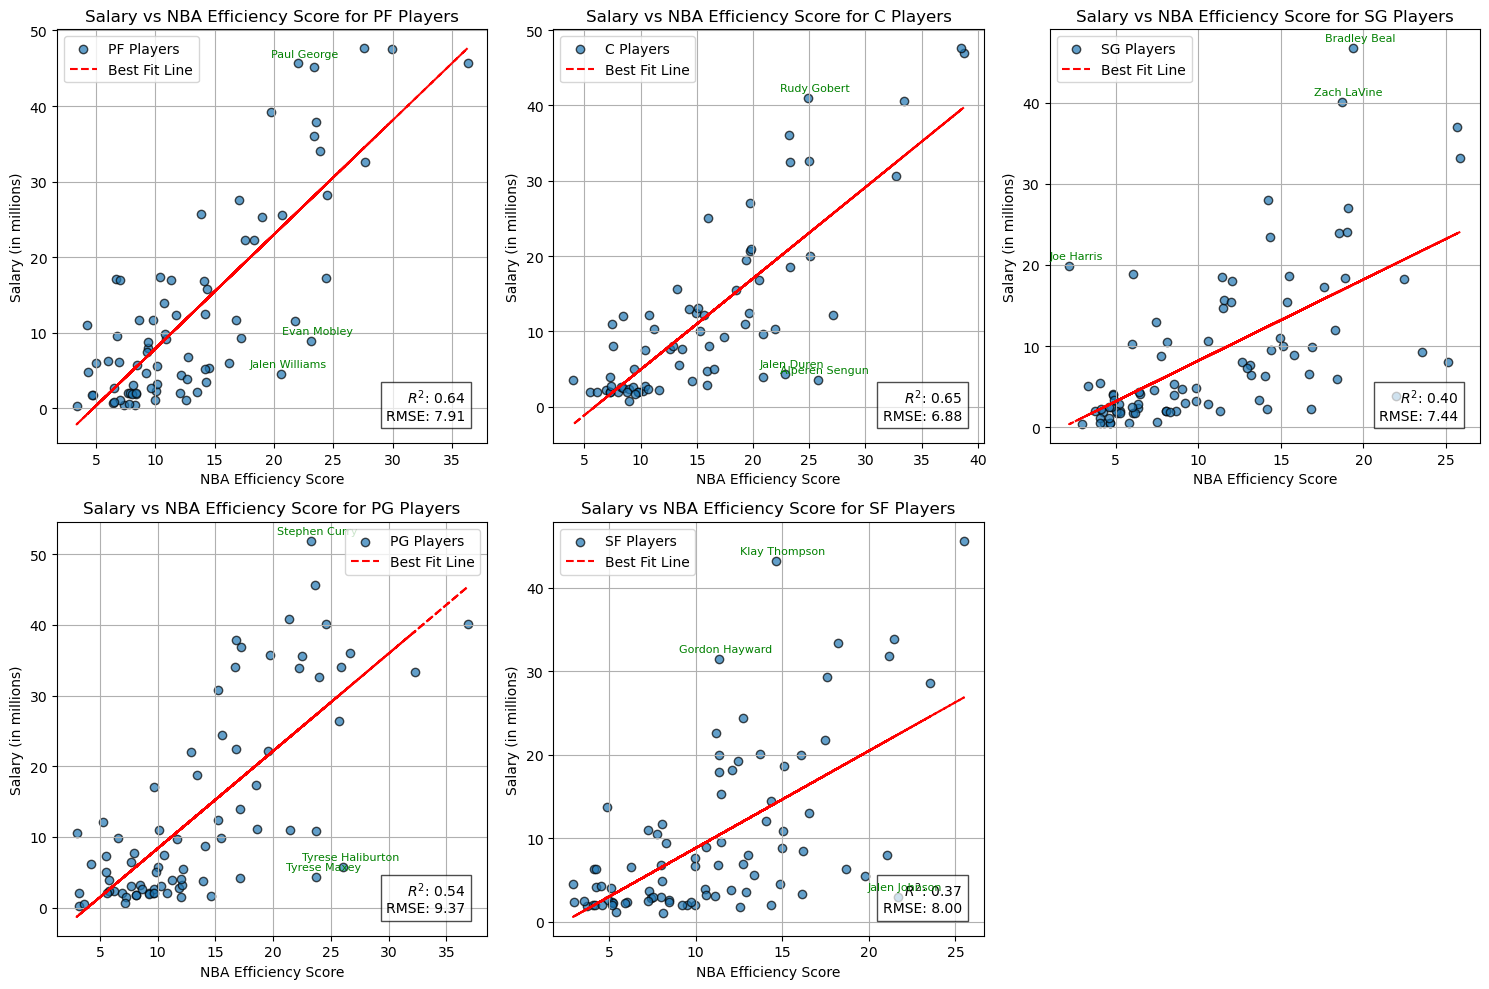

In [146]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Get the unique positions
positions = nba_data['Pos'].unique()

# Create scatter plots for each position
plt.figure(figsize=(15, 10))  # Set a larger figure size for multiple plots
for i, pos in enumerate(positions, start=1):
    # Filter data for the current position
    position_data = nba_data[nba_data['Pos'] == pos]
    
    # Extract x (NBA Efficiency Score) and y (Salary in millions)
    x = position_data['NBA_EFF']
    y = position_data['SALARY'] / 1e6  # Salary in millions for better readability
    
    # Linear regression (best fit line)
    z = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
    p = np.poly1d(z)
    y_pred = p(x)  # Predicted values based on the regression line
    
    # Calculate R^2
    ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
    ss_residual = np.sum((y - y_pred)**2)  # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Calculate residuals
    residuals = y - y_pred
    abs_residuals = np.abs(residuals)  # Absolute residuals for sorting
    
    # Determine the top 3% as outliers
    threshold = np.percentile(abs_residuals, 97)  # Top 3% threshold
    outliers = position_data[abs_residuals > threshold]
    
    # Scatter plot
    plt.subplot(2, 3, i)  # Adjust layout based on the number of positions (2 rows, 3 columns)
    plt.scatter(x, y, alpha=0.7, edgecolors='k', label=f"{pos} Players")
    plt.plot(x, y_pred, "r--", label="Best Fit Line")
    
    # Annotate R^2 and RMSE
    plt.text(0.95, 0.05, f"$R^2$: {r_squared:.2f}\nRMSE: {rmse:.2f}", 
             horizontalalignment='right', verticalalignment='bottom', 
             transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    
    # Highlight and annotate outliers
    for _, outlier in outliers.iterrows():
        plt.annotate(
            outlier['Player'],  # Assuming a 'Player' column exists
            (outlier['NBA_EFF'], outlier['SALARY'] / 1e6),
            textcoords="offset points",
            xytext=(5, 5),
            ha='center',
            fontsize=8,
            color='green'
        )
    
    # Add labels, title, and legend
    plt.title(f"Salary vs NBA Efficiency Score for {pos} Players")
    plt.xlabel("NBA Efficiency Score")
    plt.ylabel("Salary (in millions)")
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


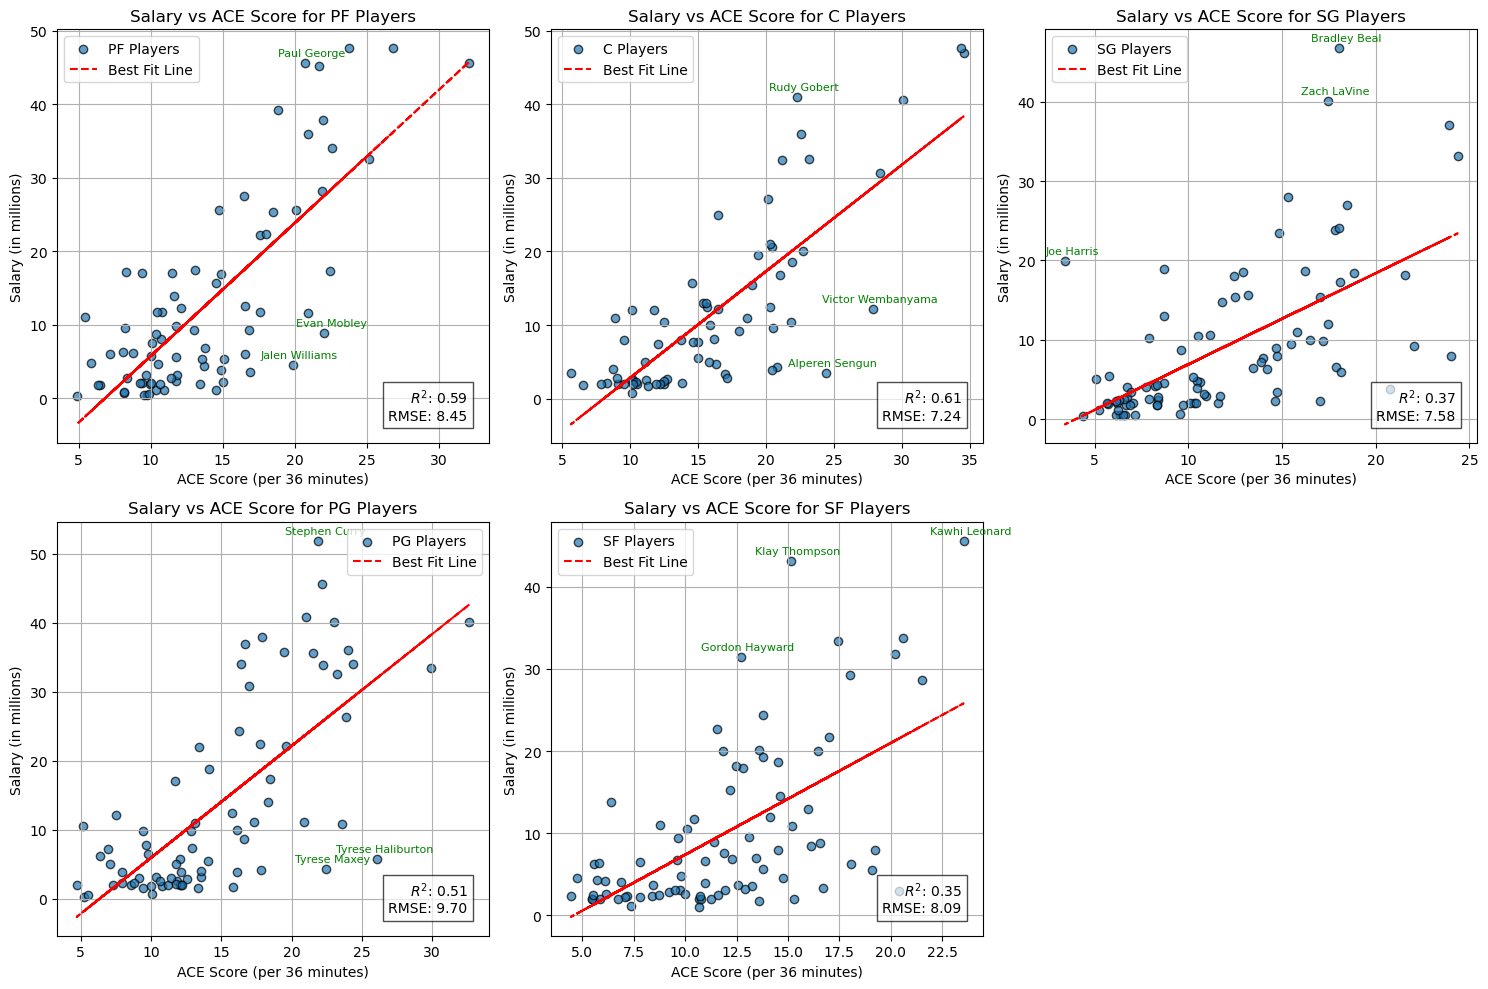

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Get the unique positions
positions = nba_data['Pos'].unique()

# Create scatter plots for each position
plt.figure(figsize=(15, 10))  # Set a larger figure size for multiple plots
for i, pos in enumerate(positions, start=1):
    # Filter data for the current position
    position_data = nba_data[nba_data['Pos'] == pos]
    
    # Extract x (Composite Score) and y (Salary in millions)
    x = position_data['Adjusted_EFF_per36']
    y = position_data['SALARY'] / 1e6  # Salary in millions for better readability
    
    # Linear regression (best fit line)
    z = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (line)
    p = np.poly1d(z)
    y_pred = p(x)  # Predicted values based on the regression line
    
    # Calculate R^2
    ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
    ss_residual = np.sum((y - y_pred)**2)  # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Calculate residuals
    residuals = y - y_pred
    abs_residuals = np.abs(residuals)  # Absolute residuals for sorting
    
    # Determine the top 3% as outliers
    threshold = np.percentile(abs_residuals, 97)  # Top 3% threshold
    outliers = position_data[abs_residuals > threshold]
    
    # Scatter plot
    plt.subplot(2, 3, i)  # Adjust layout based on the number of positions (2 rows, 3 columns)
    plt.scatter(x, y, alpha=0.7, edgecolors='k', label=f"{pos} Players")
    plt.plot(x, y_pred, "r--", label="Best Fit Line")
    
    # Annotate R^2 and RMSE
    plt.text(0.95, 0.05, f"$R^2$: {r_squared:.2f}\nRMSE: {rmse:.2f}", 
             horizontalalignment='right', verticalalignment='bottom', 
             transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    
    # Highlight and annotate outliers
    for _, outlier in outliers.iterrows():
        plt.annotate(
            outlier['Player'],  # Assuming a 'Player' column exists
            (outlier['Adjusted_EFF_per36'], outlier['SALARY'] / 1e6),
            textcoords="offset points",
            xytext=(5, 5),
            ha='center',
            fontsize=8,
            color='green'
        )
    
    # Add labels, title, and legend
    plt.title(f"Salary vs ACE Score for {pos} Players")
    plt.xlabel("ACE Score (per 36 minutes)")
    plt.ylabel("Salary (in millions)")
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


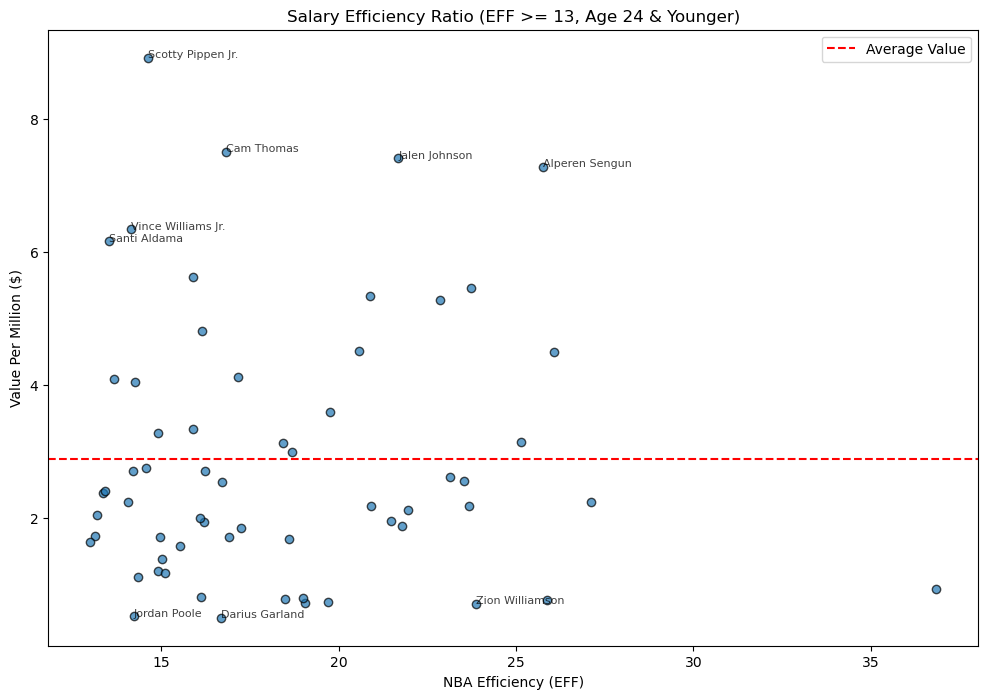

In [120]:
import matplotlib.pyplot as plt

# Filter data for NBA_EFF >= 13 BECAUSE A ROTATIONAL PLAYER IS BETWEEN 13-15 EFF. ANYTHING LOWER IS NONROTATION OR FRINGE ROSTER
filtered_data = nba_data[(nba_data['NBA_EFF'] >= 13) & (nba_data['Age'] <= 24)]

# Calculate thresholds for outliers (top and bottom 5%)
high_value_threshold = filtered_data['Value_Per_Million'].quantile(0.90)  # Top 10%
low_value_threshold = filtered_data['Value_Per_Million'].quantile(0.05)  # Bottom 5%

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(filtered_data['NBA_EFF'], filtered_data['Value_Per_Million'], alpha=0.7, edgecolor='k')

# Annotate outliers based on thresholds
for i in range(len(filtered_data)):
    if (filtered_data['Value_Per_Million'].iloc[i] > high_value_threshold or 
        filtered_data['Value_Per_Million'].iloc[i] < low_value_threshold):
        plt.annotate(
            filtered_data['Player'].iloc[i],
            (filtered_data['NBA_EFF'].iloc[i], filtered_data['Value_Per_Million'].iloc[i]),
            fontsize=8, alpha=0.75
        )

# Add average line for Value_Per_Million
plt.axhline(filtered_data['Value_Per_Million'].mean(), color='red', linestyle='--', label='Average Value')

# Labels and title
plt.xlabel('NBA Efficiency (EFF)')
plt.ylabel('Value Per Million ($)')
plt.title('Salary Efficiency Ratio (EFF >= 13, Age 24 & Younger)')
plt.legend()

plt.show()


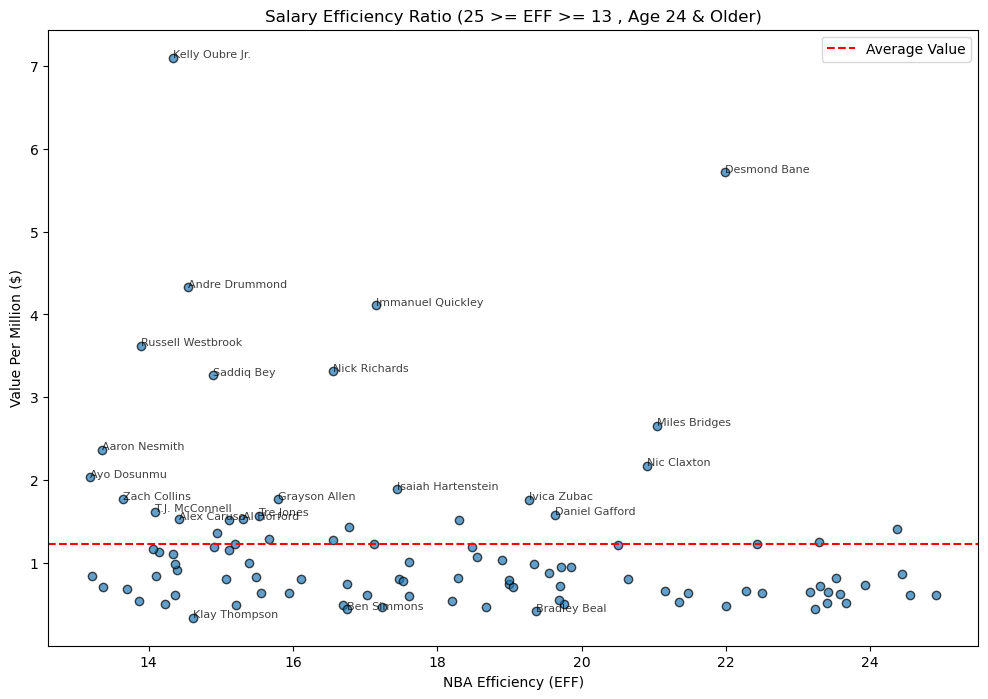

In [137]:
import matplotlib.pyplot as plt

# Filter data for NBA_EFF >= 13 and Age > 24 24 No rookie deal, 13-25 attainable
filtered_data = nba_data[(nba_data['NBA_EFF'] >= 13) & (nba_data['NBA_EFF'] <= 25) & (nba_data['Age'] >= 24)]

# Calculate thresholds for outliers (top and bottom 5%)
high_value_threshold = filtered_data['Value_Per_Million'].quantile(0.80)  # Top 20%
low_value_threshold = filtered_data['Value_Per_Million'].quantile(0.03)  # Bottom 3%

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(filtered_data['NBA_EFF'], filtered_data['Value_Per_Million'], alpha=0.7, edgecolor='k')

# Annotate outliers based on thresholds
for i in range(len(filtered_data)):
    if (filtered_data['Value_Per_Million'].iloc[i] > high_value_threshold or 
        filtered_data['Value_Per_Million'].iloc[i] < low_value_threshold):
        plt.annotate(
            filtered_data['Player'].iloc[i],
            (filtered_data['NBA_EFF'].iloc[i], filtered_data['Value_Per_Million'].iloc[i]),
            fontsize=8, alpha=0.75
        )

# Add average line for Value_Per_Million
plt.axhline(filtered_data['Value_Per_Million'].mean(), color='red', linestyle='--', label='Average Value')

# Labels and title
plt.xlabel('NBA Efficiency (EFF)')
plt.ylabel('Value Per Million ($)')
plt.title('Salary Efficiency Ratio (25 >= EFF >= 13 , Age 24 & Older)')
plt.legend()

plt.show()


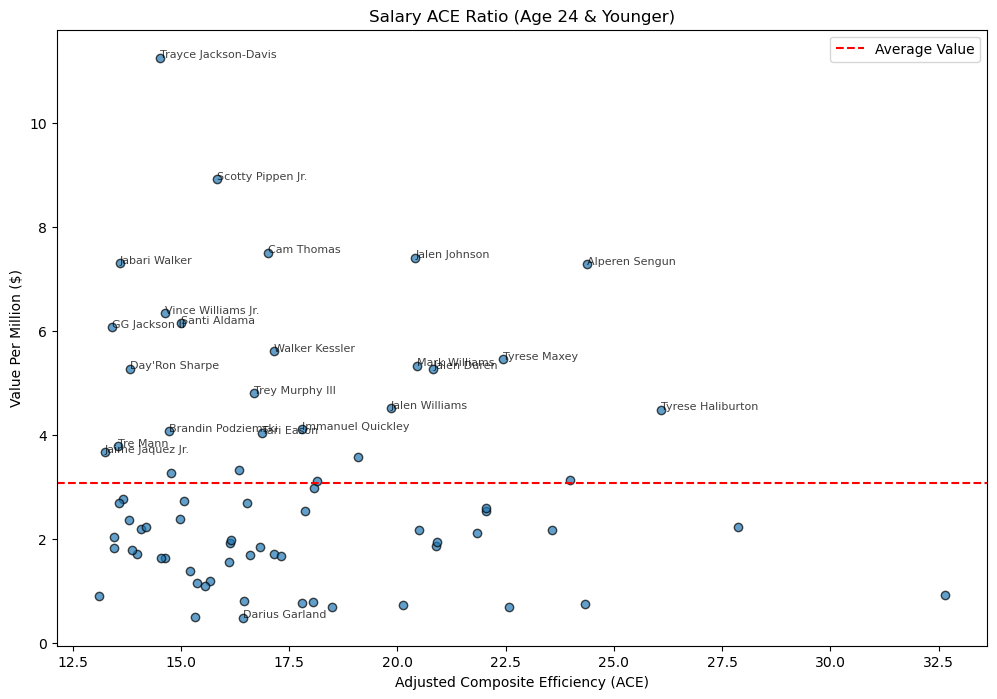

In [138]:
import matplotlib.pyplot as plt

# Filter data for NBA_EFF >= 13 BECAUSE A ROTATIONAL PLAYER IS BETWEEN 13-15 EFF. ANYTHING LOWER IS NONROTATION OR FRINGE ROSTER
filtered_data = nba_data[(nba_data['Adjusted_EFF_per36'] >= 13) & (nba_data['Age'] <= 24)]

# Calculate thresholds for outliers (top and bottom 5%)
high_value_threshold = filtered_data['Value_Per_Million'].quantile(0.70)  # Top 30%
low_value_threshold = filtered_data['Value_Per_Million'].quantile(0.01)  # Bottom 1%

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(filtered_data['Adjusted_EFF_per36'], filtered_data['Value_Per_Million'], alpha=0.7, edgecolor='k')

# Annotate outliers based on thresholds
for i in range(len(filtered_data)):
    if (filtered_data['Value_Per_Million'].iloc[i] > high_value_threshold or 
        filtered_data['Value_Per_Million'].iloc[i] < low_value_threshold):
        plt.annotate(
            filtered_data['Player'].iloc[i],
            (filtered_data['Adjusted_EFF_per36'].iloc[i], filtered_data['Value_Per_Million'].iloc[i]),
            fontsize=8, alpha=0.75
        )

# Add average line for Value_Per_Million
plt.axhline(filtered_data['Value_Per_Million'].mean(), color='red', linestyle='--', label='Average Value')

# Labels and title
plt.xlabel('Adjusted Composite Efficiency (ACE)')
plt.ylabel('Value Per Million ($)')
plt.title('Salary ACE Ratio (Age 24 & Younger)')
plt.legend()

plt.show()


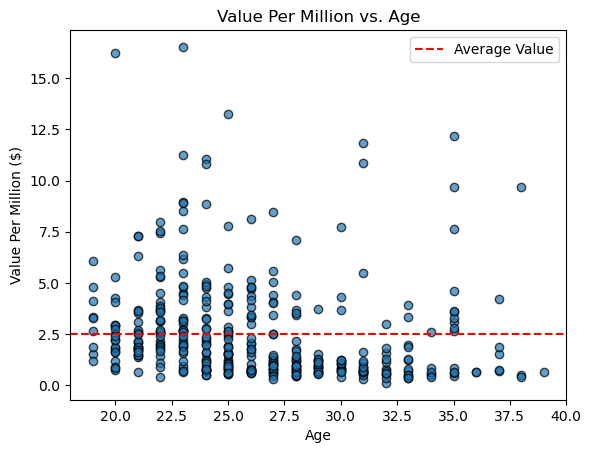

In [139]:
plt.scatter(nba_data['Age'], nba_data['Value_Per_Million'], alpha=0.7, edgecolor='k')
plt.axhline(nba_data['Value_Per_Million'].mean(), color='r', linestyle='--', label='Average Value')
plt.xlabel('Age')
plt.ylabel('Value Per Million ($)')
plt.title('Value Per Million vs. Age')
plt.legend()
plt.show()

# Value Distribution:
# Most players seem to cluster around a "Value Per Million" range of $0–5, regardless of age.
# There are outliers (players with high values) above $10–15 per million, which likely represent players providing exceptional value relative to their salary.

# Average Value:
# The red dashed line represents the average value per million across all players.
# Many data points are below this average line, indicating that a significant portion of players provide below-average value per million dollars spent.

# Age vs. Value Relationship:
# The plot does not suggest a strong linear relationship between age and value per million.
# Players of all ages are spread across the value range, with no clear trend showing that younger or older players consistently provide more value.

# Potential Outliers:
# Younger players (ages ~20–25) and a few older players (~30–35) provide exceptionally high value (above $10–15 per million).
# These might represent highly productive players on relatively inexpensive contracts (e.g., rookie contracts or undervalued veterans).

In [144]:
avg_salary_by_market = nba_data.groupby('Market_Size')['SALARY'].mean()
print(avg_salary_by_market/1000000)

# Salaries by Market Size:
# Big Markets: The average salary in big-market teams is the highest, around $12.23 million.
# Mid Markets: Mid-market teams pay slightly less on average, around $11.81 million.
# Small Markets: The lowest average salary is in small-market teams, around $10.06 million.

# Market Size Influence:
# Players in big-market teams tend to earn more, potentially due to higher team revenues, bigger sponsorships, or the ability of these markets to attract top talent.
# Small-market teams appear to have a notable salary gap compared to mid- and big-market teams, which could indicate tighter budgets or challenges in attracting high-paid players.


Market_Size
Big      12.232997
Mid      11.814387
Small    10.067479
Name: SALARY, dtype: float64


Market_Size
Big      0.560902
Mid      0.495743
Small    0.445239
Name: Team_Win%, dtype: float64


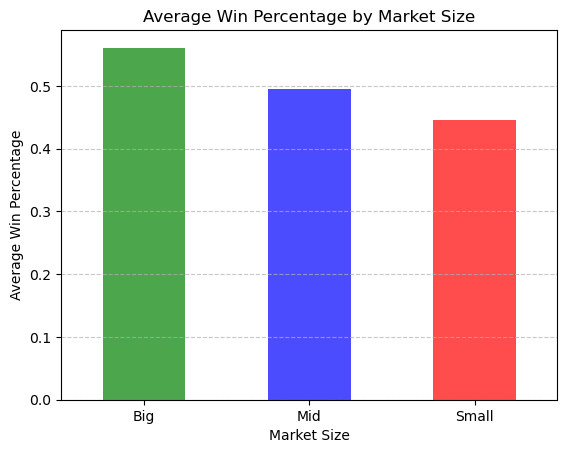

In [150]:
# Calculate average win percentage per market size
avg_win_pct_by_market = nba_data.groupby('Market_Size')['Team_Win%'].mean()

# Print the results
print(avg_win_pct_by_market)

# Visualization
import matplotlib.pyplot as plt

avg_win_pct_by_market.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
plt.title('Average Win Percentage by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Average Win Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Big Markets Have Better Win Percentages:
# Big-market teams have the highest average win percentage (56.09%), suggesting that they tend to perform better than teams in mid or small markets.
# This aligns with the earlier observation that big markets also have higher average salaries, indicating that they likely have more resources to attract and retain talent.

# Mid Markets Are Competitive:
# Mid-market teams have a respectable average win percentage of 49.57%, just below 50%. This suggests that while they may not have the same financial resources as big markets, they are still competitive.

# Small Markets Struggle:
# Small-market teams have the lowest average win percentage (44.52%), indicating they may face challenges in competing with teams from larger markets. This could be due to limited budgets, difficulty attracting top talent, or smaller fan and revenue bases.

# Performance Gap:
# There is a clear gap in performance:
# Big vs. Small Markets: A difference of ~11.5% in average win percentage.
# Mid vs. Small Markets: A smaller gap of ~5%.

# Potential Causes:
# Financial Resources:
# Big-market teams may invest more in player salaries, coaching, facilities, and other resources that contribute to success.
# Talent Attraction:
# Star players may prefer big-market teams for the exposure, endorsement opportunities, and prestige.
# Parity Challenges:
# Small-market teams may struggle to retain or attract talent due to financial constraints or less appealing markets.


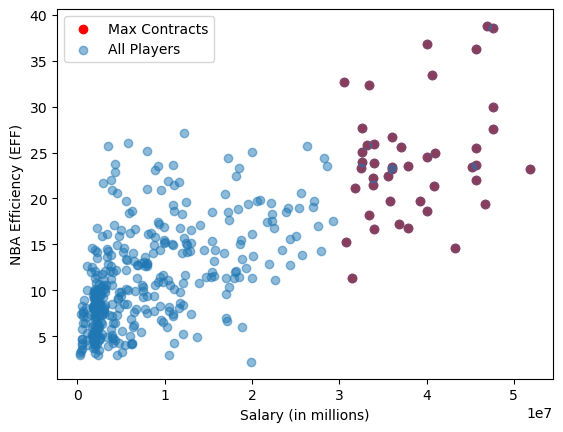

In [11]:
max_contracts = nba_data[nba_data['SALARY'] > 30e6]
plt.scatter(max_contracts['SALARY'], max_contracts['NBA_EFF'], color='red', label='Max Contracts')
plt.scatter(nba_data['SALARY'], nba_data['NBA_EFF'], alpha=0.5, label='All Players')
plt.xlabel('Salary (in millions)')
plt.ylabel('NBA Efficiency (EFF)')
plt.legend()
plt.show()


Market_Size
Big      23.048946
Mid      24.737089
Small    24.850823
Name: NBA_EFF, dtype: float64


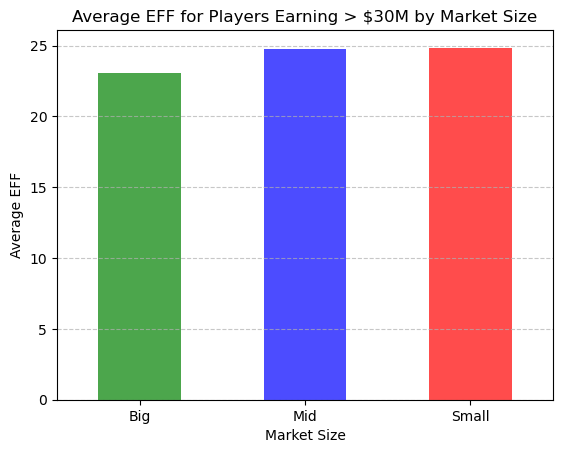

In [155]:
# Filter players making over $30 million
high_salary_players = nba_data[nba_data['SALARY'] > 30e6]

# Calculate the average EFF for these players by market size
avg_eff_by_market = high_salary_players.groupby('Market_Size')['NBA_EFF'].mean()

# Print the results
print(avg_eff_by_market)

# Optional: Visualization
import matplotlib.pyplot as plt

avg_eff_by_market.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
plt.title('Average EFF for Players Earning > $30M by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Average EFF')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# The average EFF for players earning over $30 million is relatively similar across Big, Mid, and Small market teams, suggesting that:

# Market Size Does Not Affect Top Player Performance:
# Players on max contracts are elite performers, and their efficiency remains consistent regardless of whether they play in big or small markets.
# This reflects the NBA's salary cap system, which ensures equal earning potential for top players across markets.

# NBA Parity for Top Talent:
# The similarity in EFF indicates that small-market teams can retain or attract elite players who perform on par with their big-market counterparts, maintaining competitive parity for top talent.

# Max Contracts Are Based on Talent, Not Market Size:
# The EFF consistency highlights that max contracts are tied to player achievements (e.g., All-NBA selections) and not influenced by the team's market size.

In [159]:
high_salary_players = nba_data[nba_data['SALARY'] > 30e6]
avg_eff_salary_by_pos = high_salary_players.groupby('Pos')[['NBA_EFF', 'SALARY']].mean()
print(avg_eff_salary_by_pos)

# Centers Provide the Best Value:
# They have the highest EFF among players earning over $30 million, which justifies their salaries.

# Small Forwards May Be Overvalued:
# Small forwards have the lowest EFF among high-salary players, raising concerns about their efficiency relative to cost.

# Power Forwards Are the Highest Paid:
# Despite not having the highest EFF, power forwards lead in average salary, suggesting their pay might be influenced by factors other than on-court efficiency (e.g., star power or versatility).

       NBA_EFF        SALARY
Pos                         
C    29.979413  3.847289e+07
PF   25.753850  4.115060e+07
PG   23.046375  3.745844e+07
SF   18.715017  3.656836e+07
SG   22.389675  3.925122e+07


Text(0.5, 1.0, 'Average Efficiency and Salary by Position')

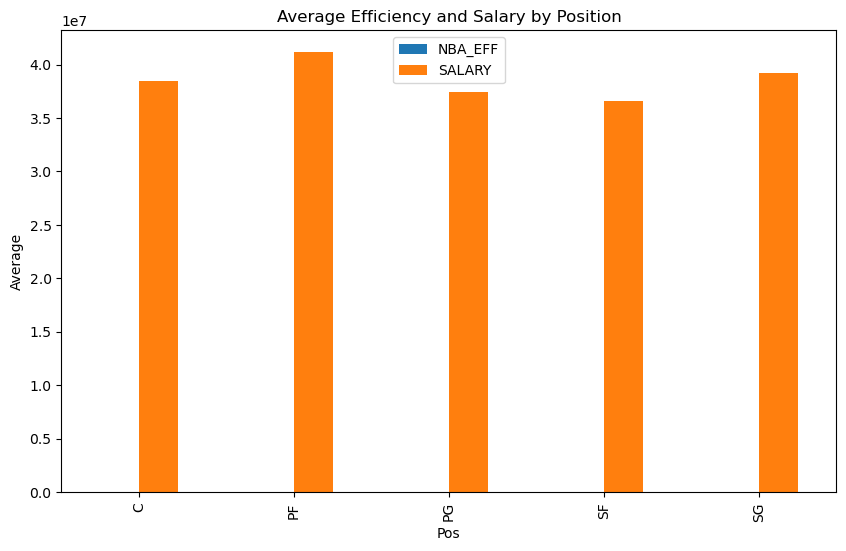

In [160]:
avg_eff_salary_by_pos.plot(kind='bar', figsize=(10, 6), ylabel='Average')
plt.title('Average Efficiency and Salary by Position')


In [163]:
team_metrics = nba_data.groupby('Tm')[['SALARY', 'NBA_EFF','Team_Win%']].mean()
print(team_metrics)

# Team Performance Correlation:
# Teams with higher win percentages, such as BOS (0.780) and DEN (0.695), generally have a combination of:
# Higher NBA Efficiency (EFF) values (e.g., BOS: 14.10, DEN: 13.85).
# Relatively higher average salaries compared to lower-performing teams.
# Conversely, low-performing teams like DET (0.171) and WAS (0.183) have lower average EFF values and lower win percentages, despite having modest salaries.

# Salary Does Not Guarantee Wins:
# Teams like NYK (0.610) and MIL (0.598) achieve relatively high win percentages without having the absolute highest salaries.
# Meanwhile, teams like BRK (0.390) and POR (0.256) have relatively high salaries but poor win percentages, suggesting inefficiencies in spending or challenges like injuries.

# EFF Correlates with Success:
# Teams with higher average EFF tend to have higher win percentages, demonstrating the importance of efficient player contributions to team success.
# For example, CLE (14.19) and DEN (13.85) show high EFF values alongside strong win percentages.

# Low EFF, Low Wins:
# Teams like WAS (10.96) and SAS (11.08) have the lowest average EFF values and struggle with low win percentages, indicating weak player contributions.

           SALARY    NBA_EFF  Team_Win%
Tm                                     
ATL  9.741269e+06  12.438560      0.439
BOS  1.401377e+07  14.097623      0.780
BRK  8.586454e+06  11.305238      0.390
CHI  1.165294e+07  13.134833      0.476
CHO  7.019171e+06  12.348354      0.256
CLE  1.290584e+07  14.191908      0.585
DAL  1.189624e+07  12.700700      0.610
DEN  1.532017e+07  13.853973      0.695
DET  8.755607e+06  11.182429      0.171
GSW  1.582874e+07  12.335246      0.561
HOU  1.065522e+07  13.316400      0.500
IND  1.007993e+07  13.785254      0.573
LAC  1.506392e+07  12.785700      0.622
LAL  1.372364e+07  13.640967      0.573
MEM  8.552488e+06  13.335175      0.329
MIA  1.239743e+07  13.670057      0.561
MIL  1.524217e+07  13.223383      0.598
MIN  1.316903e+07  12.867750      0.683
NOP  1.338968e+07  13.609467      0.598
NYK  1.119150e+07  13.258942      0.610
OKC  1.011670e+07  12.791869      0.695
ORL  8.654908e+06  10.947514      0.573
PHI  1.152020e+07  12.684193      0.573


In [ ]:
#Its obviously not all about EFF. Fit still plays a big role